In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import seaborn as sb
import numpy as np

In [2]:
import numpy
print(numpy.__version__)

1.26.4


In [3]:
file_path_client= r"C:\Users\subha\Desktop\predict-energy\Data\client.csv"
client_data= pd.read_csv(file_path_client)

In [4]:
client_data.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [5]:
file_path_electricity_prices= r"C:\Users\subha\Desktop\predict-energy\Data\electricity_prices.csv"
electricity_prices= pd.read_csv (file_path_electricity_prices)

In [6]:
electricity_prices.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [6]:
file_path_forecast_weather= r"C:\Users\subha\Desktop\predict-energy\Data\forecast_weather.csv"
forecast_weather= pd.read_csv (file_path_forecast_weather)

In [7]:
forecast_weather.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [7]:
file_path_gas_prices= r"C:\Users\subha\Desktop\predict-energy\Data\gas_prices.csv"
gas_prices= pd.read_csv (file_path_gas_prices)

In [8]:
gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [10]:
file_path_historical_weather= r"C:\Users\subha\Desktop\predict-energy\Data\historical_weather.csv"
historical_weather= pd.read_csv (file_path_historical_weather)

In [11]:
historical_weather.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [12]:
file_path_train= r"C:\Users\subha\Desktop\predict-energy\Data\train.csv"
train= pd.read_csv (file_path_train)

In [13]:
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [14]:
file_path_weather_station_to_county_mapping= r"C:\Users\subha\Desktop\predict-energy\Data\weather_station_to_county_mapping.csv"
weather_station_to_county_mapping= pd.read_csv (file_path_weather_station_to_county_mapping)

In [15]:
weather_station_to_county_mapping.head()

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN


In [16]:
gas_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB


In [17]:
electricity_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   forecast_date  15286 non-null  object 
 1   euros_per_mwh  15286 non-null  float64
 2   origin_date    15286 non-null  object 
 3   data_block_id  15286 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 477.8+ KB


In [39]:
gas_prices

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636


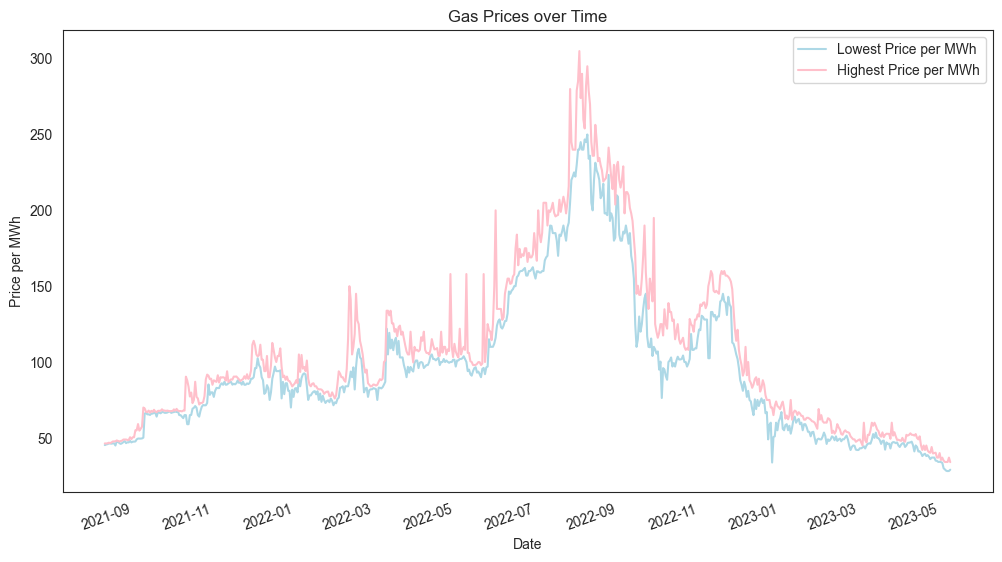

In [43]:
gas_prices['origin_date']= pd.to_datetime(gas_prices['origin_date'])
# Set the aesthetic style of the plots
sb.set_style("white")

# Initialize the figure
plt.figure(figsize=(12, 6))

# Plotting with Seaborn
sb.lineplot(data=gas_prices, x="origin_date", y="lowest_price_per_mwh", label='Lowest Price per MWh', color='lightblue')
sb.lineplot(data=gas_prices, x="origin_date", y="highest_price_per_mwh", label='Highest Price per MWh', color='pink')

# Adding titles and labels
plt.title('Gas Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price per MWh')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=20)

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [20]:
electricity_prices

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


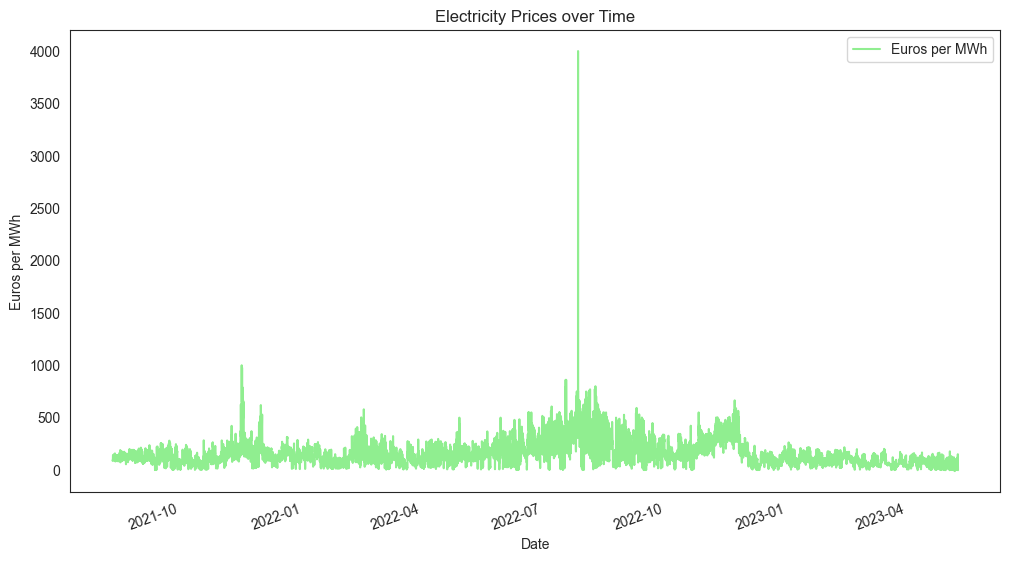

In [48]:
# Assuming electricity_prices DataFrame is already defined
# Ensure the origin_date column is in datetime format
electricity_prices['origin_date'] = pd.to_datetime(electricity_prices['origin_date'])

# Set the aesthetic style of the plots
sb.set_style("white")

# Initialize the figure
plt.figure(figsize=(12, 6))

# Plotting with Seaborn
sb.lineplot(data=electricity_prices, x="origin_date", y="euros_per_mwh", label='Euros per MWh', color='lightgreen')

# Adding titles and labels
plt.title('Electricity Prices over Time')
plt.xlabel('Date')
plt.ylabel('Euros per MWh')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=20)

# Adding a legend
plt.legend()

# Display the plot
plt.show()


It is clear to us that the spike in electricity prices between August and September in the year 2022 can be deemed as an outlier.

The exceptionally high electricity prices in Estonia between August and September 2022 can be attributed to several factors realted to the Russia-Ukraine war:

1. Energy Market Volatility: The war in Ukraine and the subsequent disruptions in the natural gas supply from Russia significantly impacted energy prices across Europe. Estonia, heavily reliant on imported energy, faced substantial price hikes as a result​​.

2. Inflation: Estonia experienced one of the highest inflation rates in the EU, reaching around 25% during this period. This inflation was driven by the increased costs of energy and food, which are significant components of consumer expenses in Estonia​​.

3. Economic Recovery: Prior to the price surge, Estonia had seen rapid economic growth and wage increases post-pandemic. However, this growth also meant that the country was more susceptible to external shocks, such as the energy crisis triggered by geopolitical tensions.

In [49]:
#dealing with outliers
electricity_prices[electricity_prices["euros_per_mwh"] == max(electricity_prices["euros_per_mwh"])]
electricity_prices.loc[electricity_prices["euros_per_mwh"] == max(electricity_prices["euros_per_mwh"]),"euros_per_mwh"] = 1000

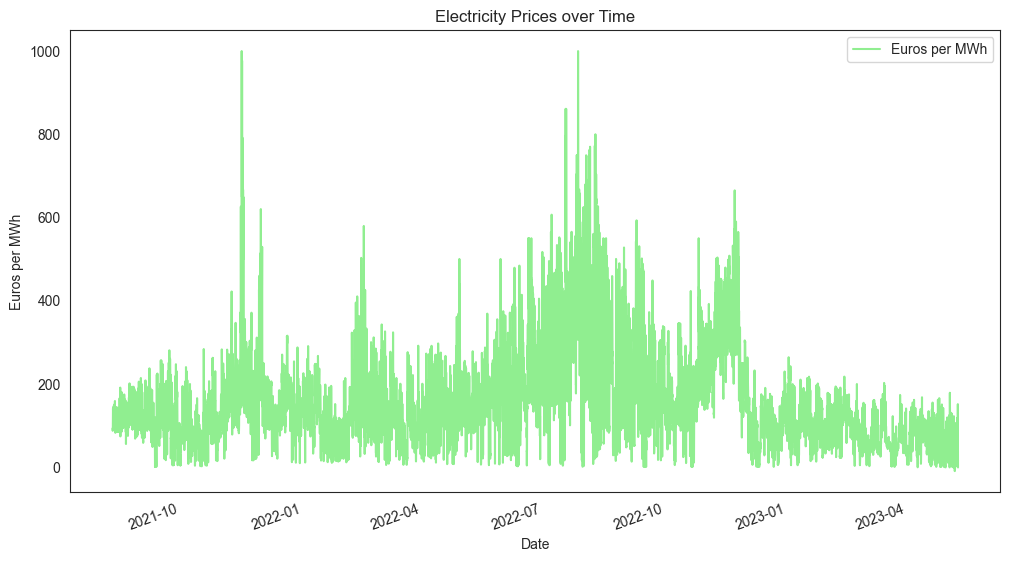

In [50]:
# Assuming electricity_prices DataFrame is already defined
# Ensure the origin_date column is in datetime format
electricity_prices['origin_date'] = pd.to_datetime(electricity_prices['origin_date'])

# Set the aesthetic style of the plots
sb.set_style("white")

# Initialize the figure
plt.figure(figsize=(12, 6))

# Plotting with Seaborn
sb.lineplot(data=electricity_prices, x="origin_date", y="euros_per_mwh", label='Euros per MWh', color='lightgreen')

# Adding titles and labels
plt.title('Electricity Prices over Time')
plt.xlabel('Date')
plt.ylabel('Euros per MWh')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=20)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [9]:
client_data

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


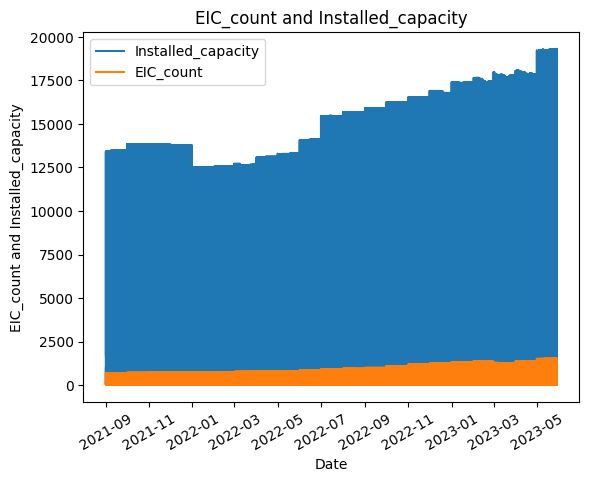

In [10]:
client_data['date']= pd.to_datetime(client_data['date'])
plt.plot(client_data["date"],client_data["installed_capacity"],label='Installed_capacity')
plt.plot(client_data["date"],client_data["eic_count"],label='EIC_count')
plt.title('EIC_count and Installed_capacity')
plt.xlabel('Date')
plt.ylabel('EIC_count and Installed_capacity')
plt.xticks(rotation=30)
plt.legend()

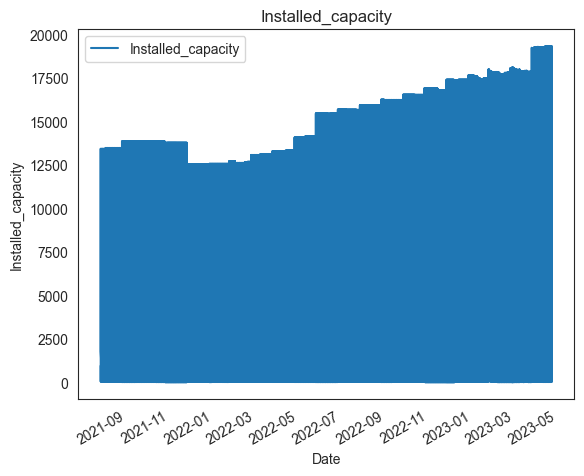

In [51]:
client_data['date']= pd.to_datetime(client_data['date'])
plt.plot(client_data["date"],client_data["installed_capacity"],label='Installed_capacity')
plt.title('Installed_capacity')
plt.xlabel('Date')
plt.ylabel('Installed_capacity')
plt.xticks(rotation=30)
plt.legend()

C:\Users\subha\AppData\Local\Temp\ipykernel_6432\3702203008.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]
C:\Users\subha\AppData\Local\Temp\ipykernel_6432\3702203008.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]


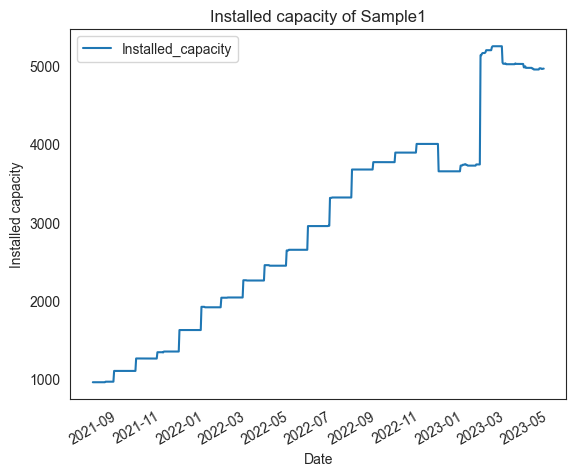

In [52]:
client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]
client_sample1['date']= pd.to_datetime(client_sample1['date'])
plt.plot(client_sample1["date"],client_sample1["installed_capacity"],label='Installed_capacity')
plt.title('Installed capacity of Sample1')
plt.xlabel('Date')
plt.ylabel('Installed capacity')
plt.xticks(rotation=30)
plt.legend()

C:\Users\subha\AppData\Local\Temp\ipykernel_6432\2814715262.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]
C:\Users\subha\AppData\Local\Temp\ipykernel_6432\2814715262.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]


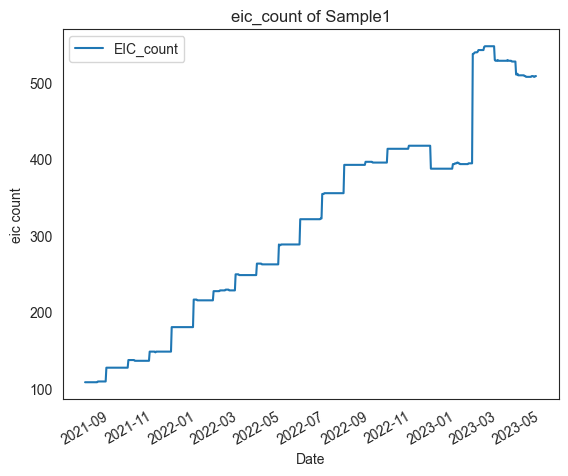

In [53]:
client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]
client_sample1['date']= pd.to_datetime(client_sample1['date'])
plt.plot(client_sample1["date"],client_sample1["eic_count"],label='EIC_count')
plt.title('eic_count of Sample1')
plt.xlabel('Date')
plt.ylabel('eic count')
plt.xticks(rotation=30)
plt.legend()

C:\Users\subha\AppData\Local\Temp\ipykernel_3968\1001764079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\1001764079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\1001764079.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

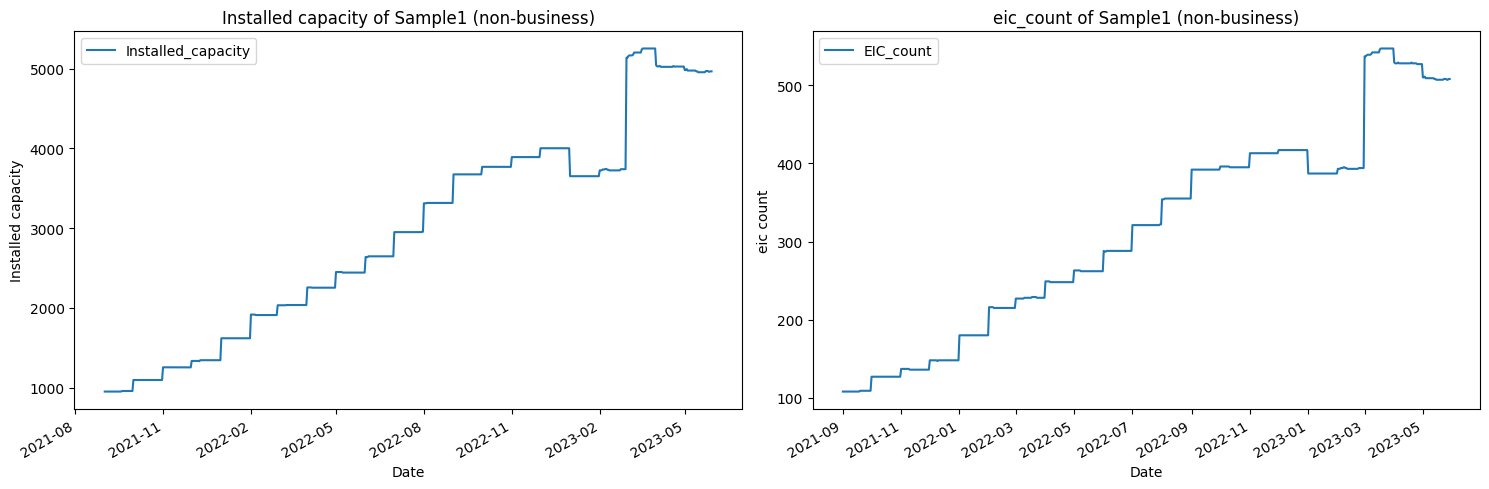

In [30]:
client_sample1 = client_data[(client_data['county'] == 0) & (client_data['is_business'] == 0) & (client_data['product_type'] == 1)]
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax1.plot(client_sample1["date"], client_sample1["installed_capacity"], label='Installed_capacity')
ax1.set_title('Installed capacity of Sample1 (non-business)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Installed capacity')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()

# Second plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax2.plot(client_sample1["date"], client_sample1["eic_count"], label='EIC_count')
ax2.set_title('eic_count of Sample1 (non-business)')
ax2.set_xlabel('Date')
ax2.set_ylabel('eic count')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend()

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_3968\2309609726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\2309609726.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\2309609726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

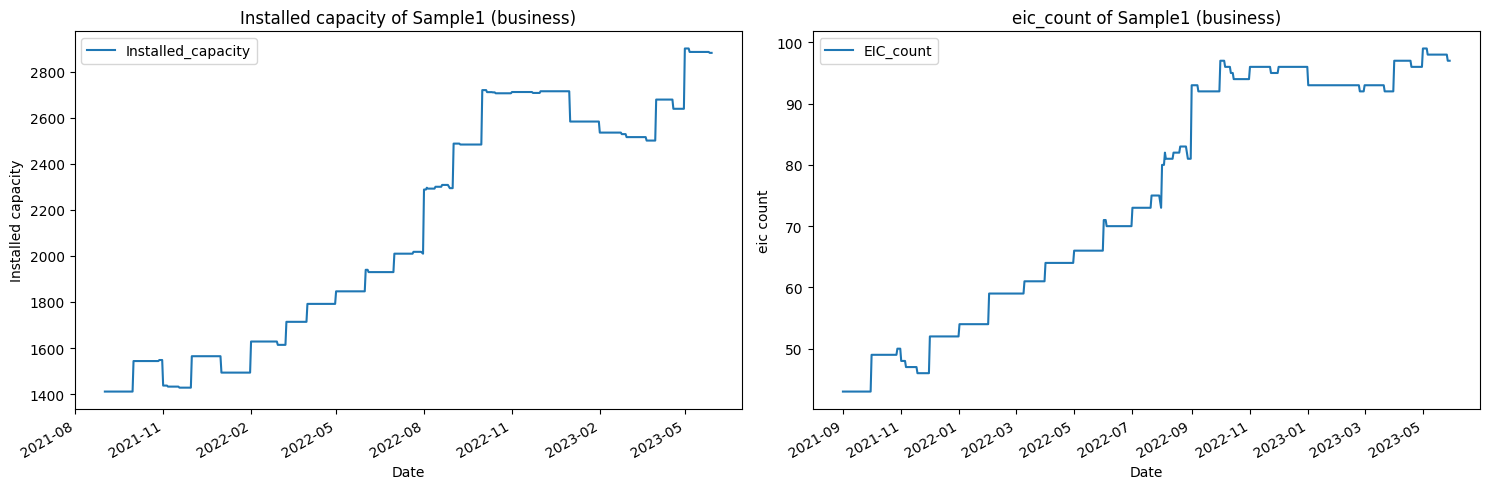

In [31]:
client_sample1 = client_data[(client_data['county'] == 0) & (client_data['is_business'] == 1) & (client_data['product_type'] == 1)]
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax1.plot(client_sample1["date"], client_sample1["installed_capacity"], label='Installed_capacity')
ax1.set_title('Installed capacity of Sample1 (business)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Installed capacity')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()

# Second plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax2.plot(client_sample1["date"], client_sample1["eic_count"], label='EIC_count')
ax2.set_title('eic_count of Sample1 (business)')
ax2.set_xlabel('Date')
ax2.set_ylabel('eic count')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend()

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_3968\82119087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\82119087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\82119087.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

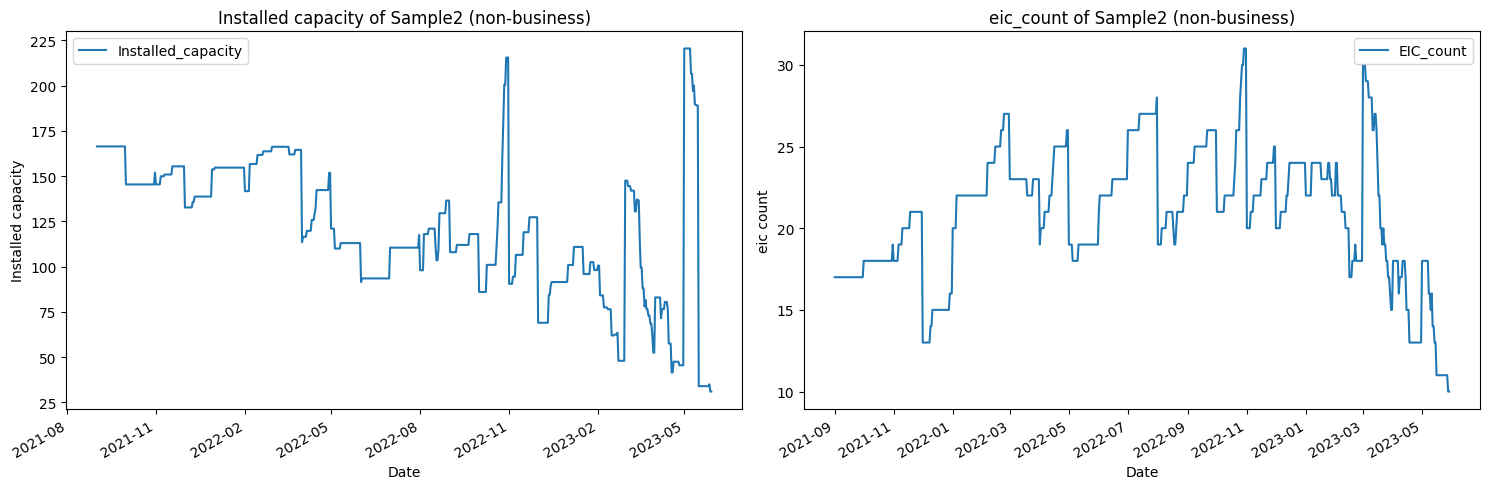

In [32]:
client_sample1 = client_data[(client_data['county'] == 0) & (client_data['is_business'] == 0) & (client_data['product_type'] == 2)]
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax1.plot(client_sample1["date"], client_sample1["installed_capacity"], label='Installed_capacity')
ax1.set_title('Installed capacity of Sample2 (non-business)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Installed capacity')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()

# Second plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax2.plot(client_sample1["date"], client_sample1["eic_count"], label='EIC_count')
ax2.set_title('eic_count of Sample2 (non-business)')
ax2.set_xlabel('Date')
ax2.set_ylabel('eic count')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend()

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_3968\1816655815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\1816655815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_sample1['date'] = pd.to_datetime(client_sample1['date'])
C:\Users\subha\AppData\Local\Temp\ipykernel_3968\1816655815.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

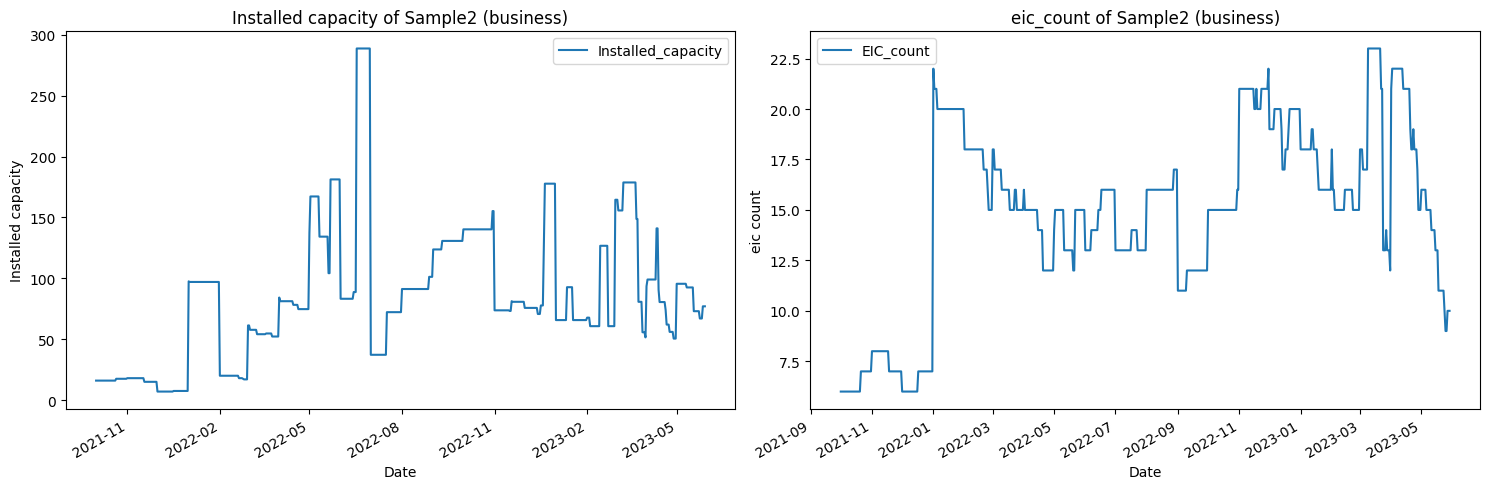

In [33]:
client_sample1 = client_data[(client_data['county'] == 0) & (client_data['is_business'] == 1) & (client_data['product_type'] == 2)]
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax1.plot(client_sample1["date"], client_sample1["installed_capacity"], label='Installed_capacity')
ax1.set_title('Installed capacity of Sample2 (business)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Installed capacity')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()

# Second plot
client_sample1['date'] = pd.to_datetime(client_sample1['date'])
ax2.plot(client_sample1["date"], client_sample1["eic_count"], label='EIC_count')
ax2.set_title('eic_count of Sample2 (business)')
ax2.set_xlabel('Date')
ax2.set_ylabel('eic count')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.legend()

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_6432\713921775.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]
C:\Users\subha\AppData\Local\Temp\ipykernel_6432\713921775.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]


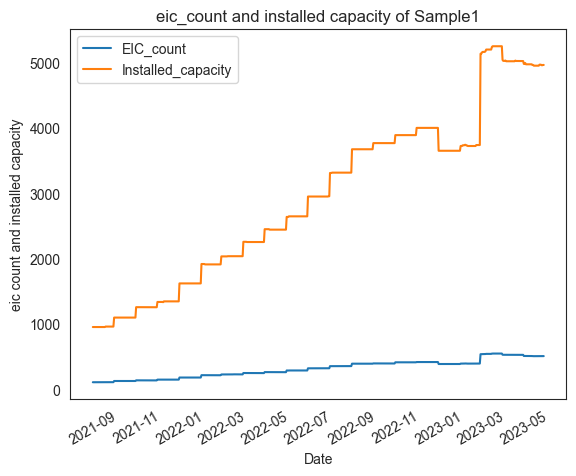

In [64]:
client_sample1 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 1]
client_sample1['date']= pd.to_datetime(client_sample1['date'])
plt.plot(client_sample1["date"],client_sample1["eic_count"],label='EIC_count')
plt.plot(client_sample1["date"],client_sample1["installed_capacity"],label='Installed_capacity')
plt.title('eic_count and installed capacity of Sample1')
plt.xlabel('Date')
plt.ylabel('eic count and installed capacity')
plt.xticks(rotation=30)
plt.legend()

C:\Users\subha\AppData\Local\Temp\ipykernel_6432\748858674.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample2 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 2]
C:\Users\subha\AppData\Local\Temp\ipykernel_6432\748858674.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample2 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 2]


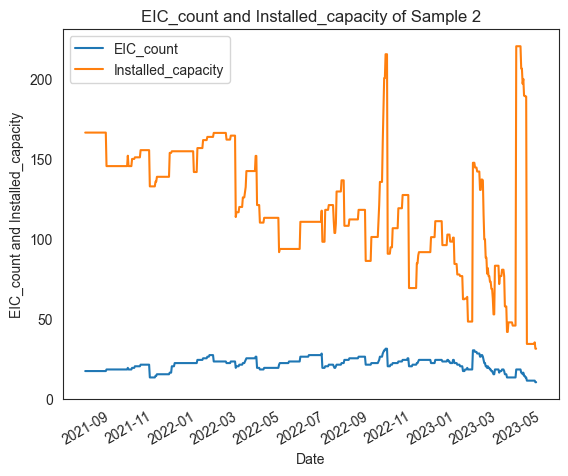

In [63]:
client_sample2 = client_data[client_data['county'] == 0][client_data['is_business'] == 0][client_data['product_type'] == 2]
client_sample2['date']= pd.to_datetime(client_sample2['date'])
plt.plot(client_sample2["date"],client_sample2["eic_count"],label='EIC_count')
plt.plot(client_sample2["date"],client_sample2["installed_capacity"],label='Installed_capacity')
plt.title('EIC_count and Installed_capacity of Sample 2')
plt.xlabel('Date')
plt.ylabel('EIC_count and Installed_capacity')
plt.xticks(rotation=30)
plt.legend()

C:\Users\subha\AppData\Local\Temp\ipykernel_6432\3266034035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample3 = client_data[client_data['county'] == 0][client_data['is_business'] == 1][client_data['product_type'] == 1]
C:\Users\subha\AppData\Local\Temp\ipykernel_6432\3266034035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample3 = client_data[client_data['county'] == 0][client_data['is_business'] == 1][client_data['product_type'] == 1]


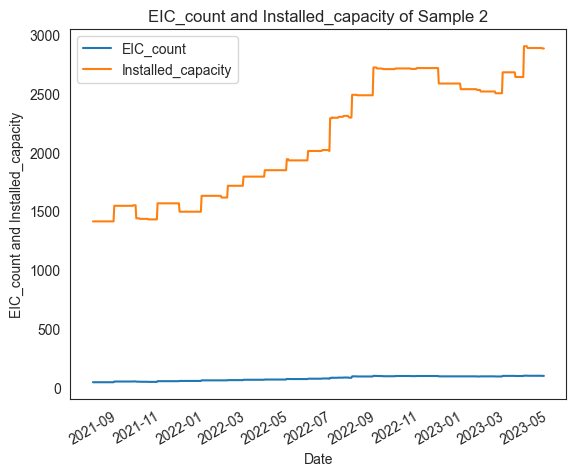

In [72]:
client_sample3 = client_data[client_data['county'] == 0][client_data['is_business'] == 1][client_data['product_type'] == 1]
client_sample3['date']= pd.to_datetime(client_sample3['date'])
plt.plot(client_sample3["date"],client_sample3["eic_count"],label='EIC_count')
plt.plot(client_sample3["date"],client_sample3["installed_capacity"],label='Installed_capacity')
plt.title('EIC_count and Installed_capacity of Sample 2')
plt.xlabel('Date')
plt.ylabel('EIC_count and Installed_capacity')
plt.xticks(rotation=30)
plt.legend()

C:\Users\subha\AppData\Local\Temp\ipykernel_6432\108790022.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample4 = client_data[client_data['county'] == 0][client_data['is_business'] == 1][client_data['product_type'] == 2]
C:\Users\subha\AppData\Local\Temp\ipykernel_6432\108790022.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  client_sample4 = client_data[client_data['county'] == 0][client_data['is_business'] == 1][client_data['product_type'] == 2]


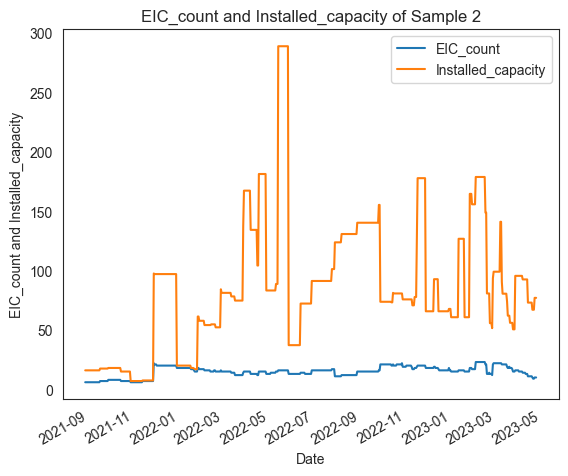

In [73]:
client_sample4 = client_data[client_data['county'] == 0][client_data['is_business'] == 1][client_data['product_type'] == 2]
client_sample4['date']= pd.to_datetime(client_sample4['date'])
plt.plot(client_sample4["date"],client_sample4["eic_count"],label='EIC_count')
plt.plot(client_sample4["date"],client_sample4["installed_capacity"],label='Installed_capacity')
plt.title('EIC_count and Installed_capacity of Sample 2')
plt.xlabel('Date')
plt.ylabel('EIC_count and Installed_capacity')
plt.xticks(rotation=30)
plt.legend()